# Shallow Net Demo in Keras (https://keras.io)

This notebook will cover creating a shallow neural network to clasify MNIST digits.

### MNIST DATASET

MNIST database consists of handwritten digits, which has a training set of 60,000 images, and a test set of 10,000 images. Database was constructed from NIST's Special Database 3 (SD-3) & Special Database 1 (SD-1) which contains digits handwritten by US Census Bureau employees and high-school students, respectively. 

|Training Set|Test Set
-|-|-
**SD-3**|30,000|5,000
**SD-1**|30,000|5,000

Each image is **28x28** i.e we have **784** pixels in each image.


#### Setting seed for reproducability

In [1]:
import numpy as np
np.random.seed(10)

#### Import Dependencies

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#### What is Dense Layer?

Each image is 28x28 i.e we have 784 pixels in each image.

0|1|..........|27
-|-|----------|
28|29|........|55
.|.|..........|
.|.|..........|
.|.|..........|
.|.|..........|**783**

We are going to flatten the image to create an array of 784 elements. 

[0,|1,|2,|......|27,|28,|......|783]
-|-|-|-|-|-|-|

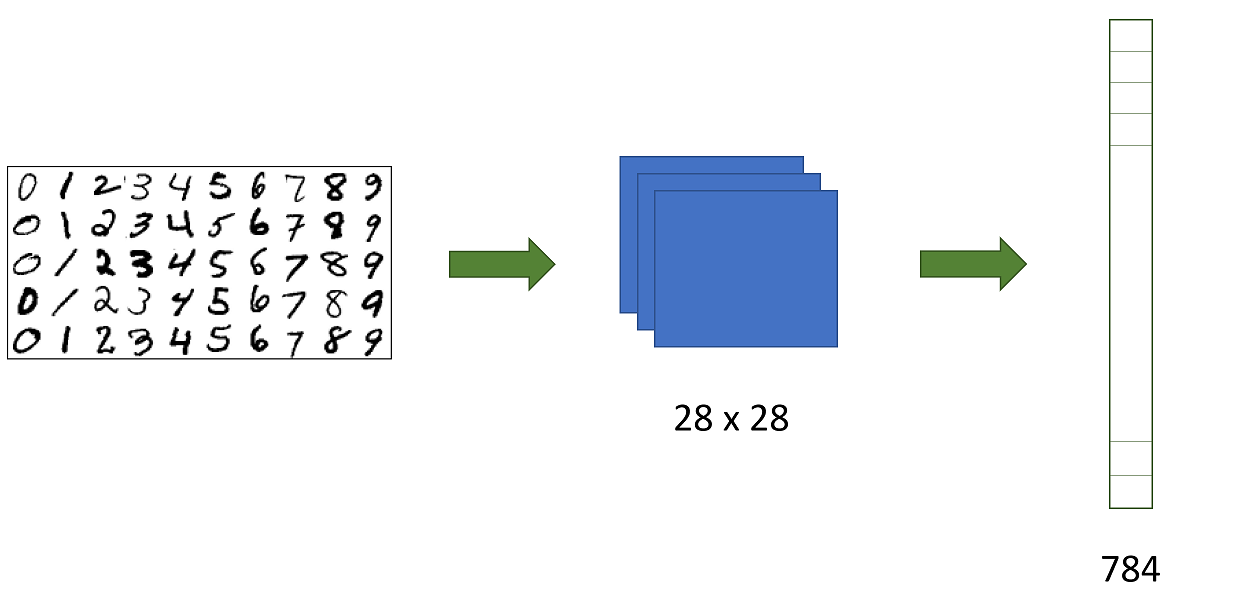

* Flattened array of 784 elements(pixels) above is **INPUT** to our neural net.
* **INPUT LAYER** is fed into **HIDDEN LAYER** to clasify digits into 10 possible classes i.e. 0 to 9 in the **OUTPUT LAYER**.
* A layer is said to be **DENSE or FULLY CONNECTED** when all the neurons of a layer are fully connected to all of the neurons of layer above and as well as layer below, as shown in the image below.
* For Eg: In this scenario, if you pick in any neuron in hidden layer, its receiving input from all 784 neurons of input layer and outputing to all 10 neurons of output layer.

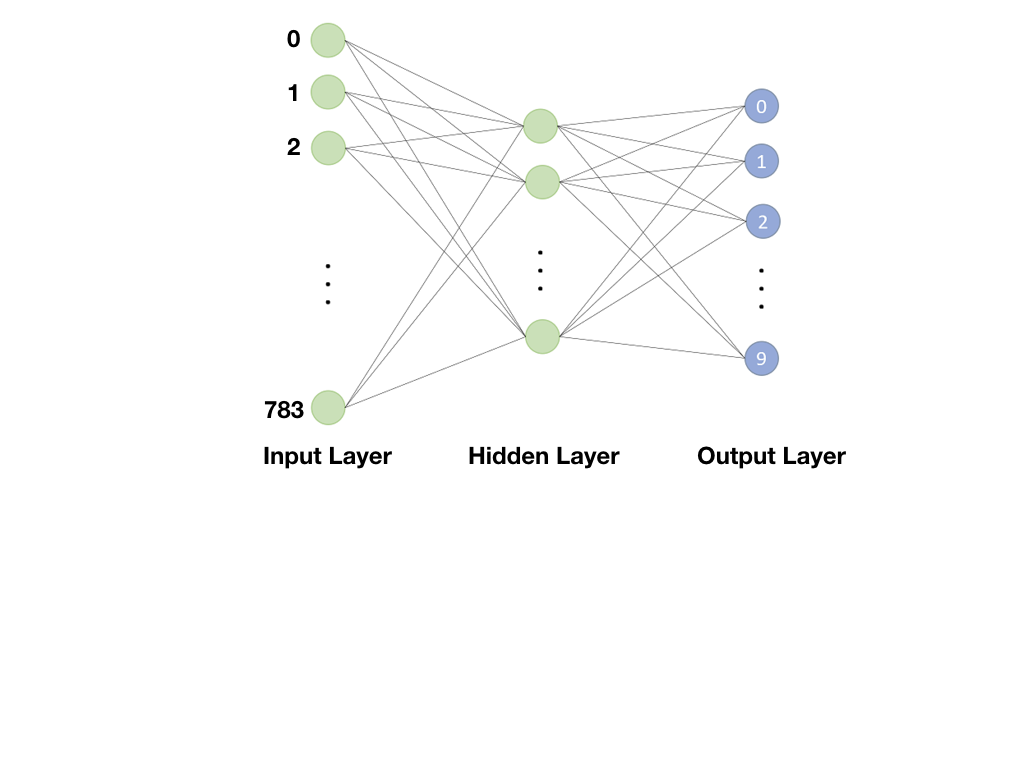

#### Load Data